In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(418, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
data.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Here we do not need PassengerId, Name, Ticket, Fare, Cabin and Embarked columns

In [9]:
data = data.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'])

In [10]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
dtype: int64

In [11]:
sex_mapping = {'female': 0,'male': 1}
data["Sex"] = data["Sex"].map(sex_mapping)

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,34.5,0,0
1,1,3,0,47.0,1,0
2,0,2,1,62.0,0,0
3,0,3,1,27.0,0,0
4,1,3,0,22.0,1,1


### Visualizing the Data 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### HeatMap

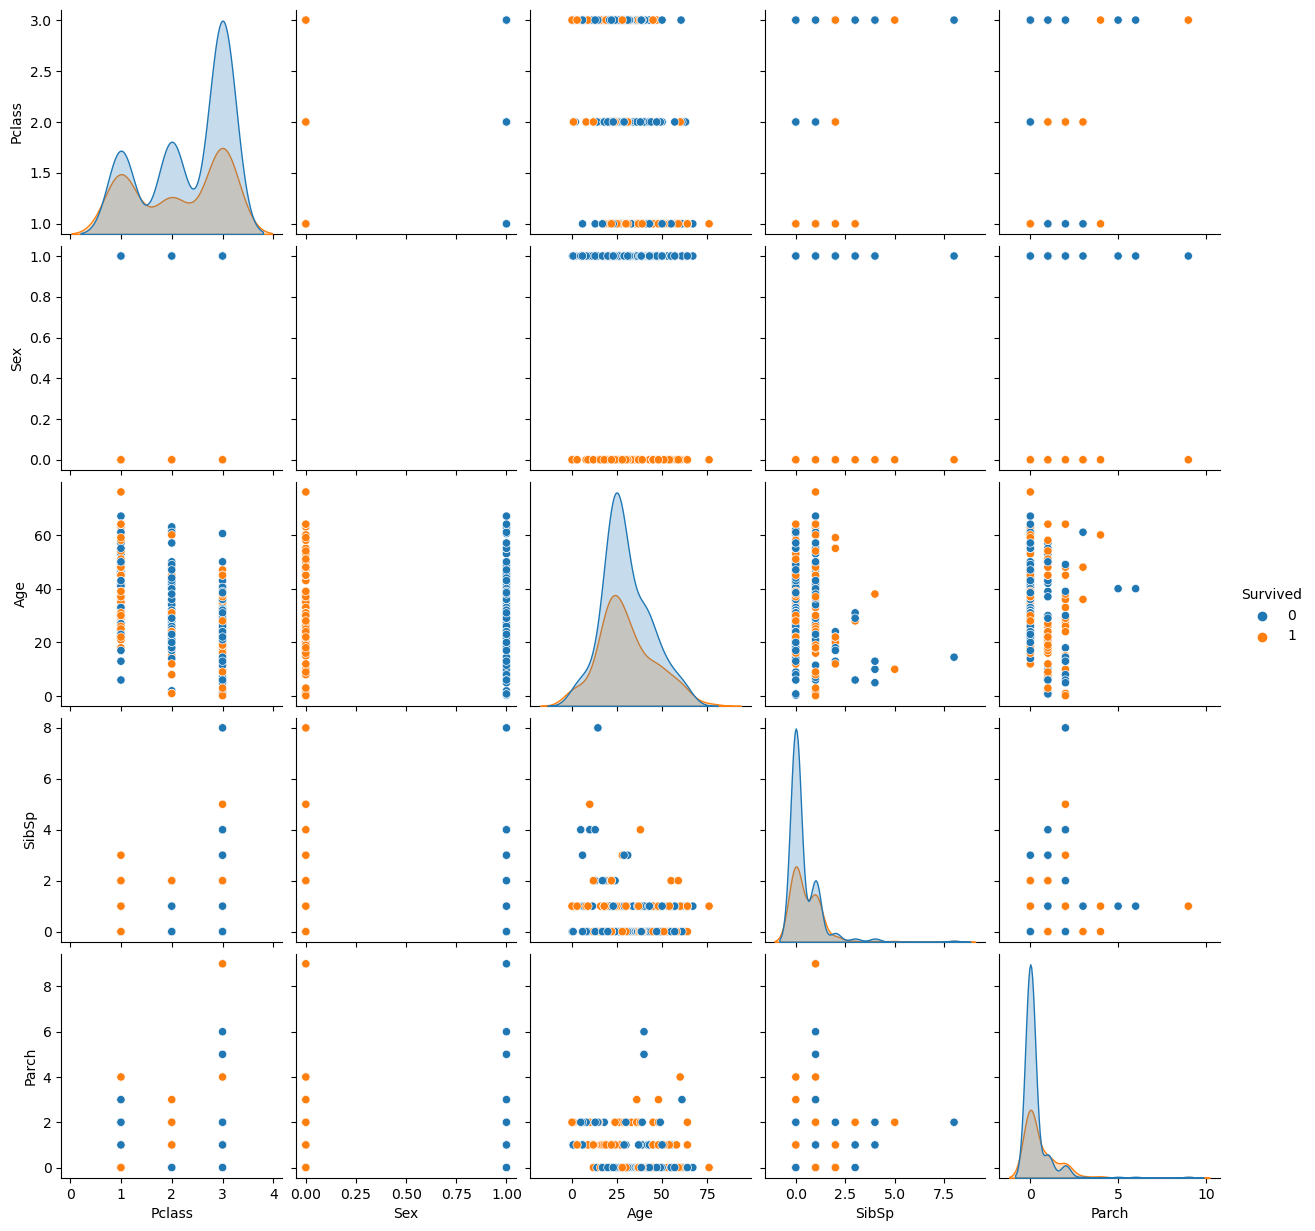

In [14]:
sns.pairplot(data,hue='Survived')
plt.show()

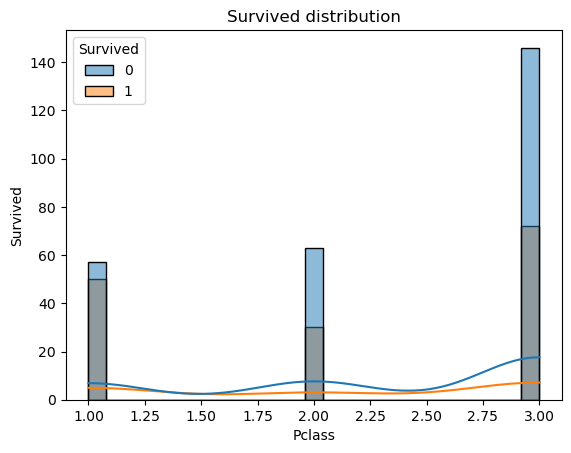

In [15]:
sns.histplot(data,x="Pclass",bins=25,kde=True,hue="Survived")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.title("Survived distribution")
plt.show()

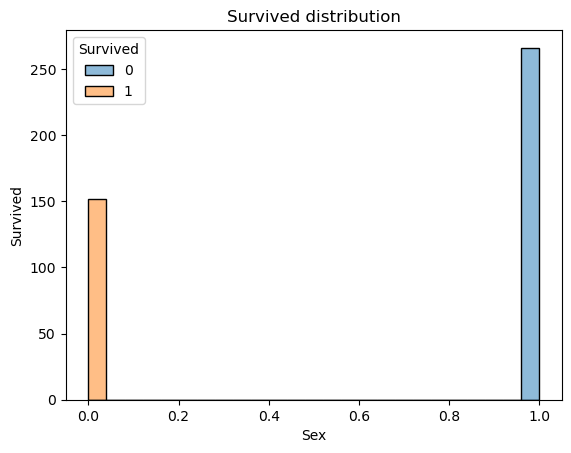

In [16]:
sns.histplot(data,x="Sex",bins=25,kde=True,hue="Survived")
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Survived distribution")
plt.show()

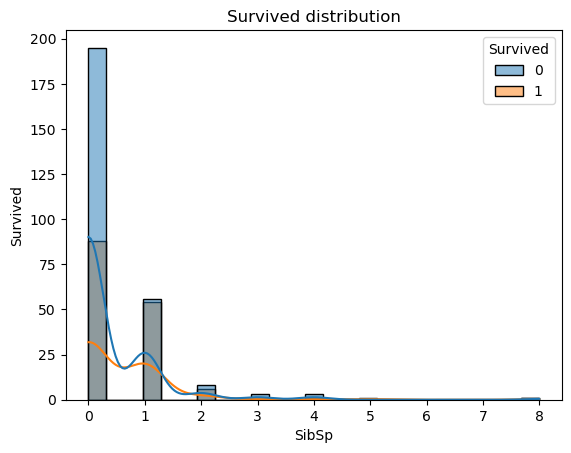

In [17]:
sns.histplot(data,x="SibSp",bins=25,kde=True,hue="Survived")
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.title("Survived distribution")
plt.show()

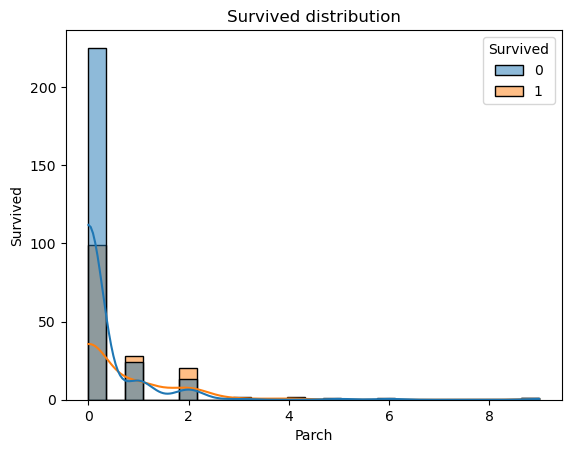

In [18]:
sns.histplot(data,x="Parch",bins=25,kde=True,hue="Survived")
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.title("Survived distribution")
plt.show()

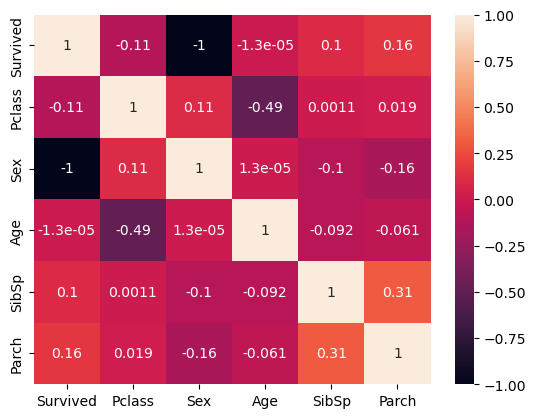

In [19]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
X=data[['Pclass','Sex','SibSp','Parch']]
y=data[['Survived']]

In [23]:
model.fit(X,y)

LogisticRegression()

In [24]:
model.score(X,y)

1.0

In [25]:
expected = y
#The values for prediction are Pclass is 1,2,3 and Male=1, Female=0
#The SibSp are 0 or 1 and Parch are 0 or 1

#predicted = model.predict([[Pclass,Sex,SibSp,Parch]])
predicted = model.predict([[3,0,0,0]])
if predicted==0:
    print("Not Survived")
else:
    print("Survived")

Survived
